<a href="https://colab.research.google.com/github/shyney7/colabAI-lec-py/blob/main/SVM_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

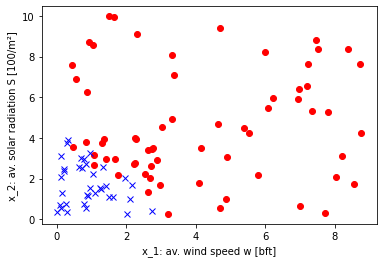

In [ ]:
!pip install qpsolvers
import numpy as np
import qpsolvers
from qpsolvers import solve_qp, sparse_solvers, dense_solvers
import matplotlib.pyplot as plt

# import data from csv file
M = np.loadtxt('weather_data_not_separable.csv', delimiter=',', skiprows=0)

# extract X & Y values
X = M[:, :2]
Y = M[:, 2]

# input- & datasize variables
n = np.size(X, 0)
m = np.size(X, 1)

# plot data points
for i in range(n):
  if(Y[i] < 0):
    plt.plot(X[i,0], X[i,1], 'xb')
  else:
    plt.plot(X[i,0], X[i,1], 'or')
plt.xlabel('x_1: av. wind speed w [bft]')
plt.ylabel('x_2: av. solar radiation S [100/m²]')
plt.show()

In [ ]:
# create cost func. matrix
H = np.zeros((m+1, m+1))
for i in range(np.size(H,0)-1):
  H[i,i] = 1.0

# contraint matrix A
A = np.zeros((n, m+1))
for i in range(n):
  for j in range(m):
    A[i,j] = -X[i,j] * Y[i]
  A[i,m] = -Y[i]

# contraint vec. b
b = -np.ones((n,1))

# cost func. vec.
f = np.zeros((m+1, 1))

# reshape f & b to fit opt. func. format
f = f.reshape((3,))
b = b.reshape((100,))

# solve QP
v = solve_qp(H, f, A, b, solver=sparse_solvers[0])
print('v: ', v)

ValueError: ignored